### examining the performance in trial vs control stores to provide a recommendation for each location 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [2]:
# import dataset

store_data = pd.read_csv("./QVI_data.csv")
store_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
#Extract month and year from DATE column
store_data['MONTH']=pd.to_datetime(store_data['DATE']).dt.to_period('M')
store_data = store_data[['LYLTY_CARD_NBR','DATE', 'MONTH','STORE_NBR', 'TXN_ID','PROD_NBR',
                        'PROD_NAME','PROD_QTY','TOT_SALES','PACK_SIZE','BRAND','LIFESTAGE',
                         'PREMIUM_CUSTOMER']] # rearrange the columns
store_data.head()

,LYLTY_CARD_NBR,DATE,MONTH,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,2018-10,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,2018-09,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,2019-03,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,2019-03,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,2018-11,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
# create a function which can find monthly total sales revenue for given month and store

def monthly_total_sales(strorenumber):
    #Group by to find total sales for a month
    store_data.sort_values(by = 'DATE', inplace=True)
    monthly_sale = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TOT_SALES'].sum()).reset_index()
    monthly_sale['MONTH'] = monthly_sale['MONTH'].astype(str)
    
    # filter store number
    store_sale =  monthly_sale[monthly_sale['STORE_NBR'] == strorenumber ]
    
    #plot bar graph using plotly
    fig = px.bar(store_sale, x = 'MONTH', y = 'TOT_SALES')
    fig.update_layout(title='Total Sales per month',
                      yaxis = dict(title = "Total Sales"),
                      xaxis = dict(title = "Month")
                     )
    fig.show()
    

# create a function which can find monthly total number of customer
def monthly_total_customer(strorenumber):
    
    #To find monthly total number of customer group by the dataset 
    monthly_customer = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TXN_ID'].count()).reset_index()
    monthly_customer['MONTH'] = monthly_customer['MONTH'].astype(str)
    
    #Filter the data on Store number
    total_cust =  monthly_customer[monthly_customer['STORE_NBR'] == strorenumber ]
    
    # Plot a bar graph
    fig = px.bar(total_cust, x = 'MONTH', y = 'TXN_ID')
    fig.update_layout(title='Number of Customer per month',
                      yaxis = dict(title = "Total customer count"),
                      xaxis = dict(title = "Month")
                     )
    fig.show()

# create a function which can find monthly Avg Trax per customer
def monthly_trax_per_cust(strorenumber):
    #To find Average transaction per customer group by the dataset
    trax_monthly = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].value_counts())
    trax_monthly=pd.DataFrame(trax_monthly.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].mean().reset_index())
    trax_monthly['MONTH'] = trax_monthly['MONTH'].astype(str)
    
    #Filter the dataset on storenumber
    teax_per_cust =  trax_monthly[trax_monthly['STORE_NBR'] == strorenumber ]
    
    #Plot a bar graph
    fig = px.bar(teax_per_cust, x = 'MONTH', y = 'LYLTY_CARD_NBR')
    fig.update_layout(title='Avg Trax per month',
                      yaxis = dict(title = "Total customer count"),
                      xaxis = dict(title = "Month")
                     )
    fig.show()

In [169]:
import plotly.graph_objects as go

#Comparision of two store's monthly sale
def comparision_two_month_sale(store_number1,store_number2):
    #Group by to find total sales for a month
    store_data.sort_values(by = 'DATE', inplace=True)
    monthly_sale = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TOT_SALES'].sum()).reset_index()
    monthly_sale['MONTH'] = monthly_sale['MONTH'].astype(str)
    
    #filter the store
    store_sale1 =  monthly_sale[monthly_sale['STORE_NBR'] == store_number1 ]
    store_sale2 =  monthly_sale[monthly_sale['STORE_NBR'] == store_number2 ]
    
    #Plot bar graph
    fig = go.Figure(data=[
        go.Scatter(name=store_number1, x=monthly_sale['MONTH'],y=store_sale1['TOT_SALES'], line=dict(color='firebrick', width=4)),
        go.Scatter(name=store_number2, x=monthly_sale['MONTH'], y=store_sale2['TOT_SALES'], line=dict(color='royalblue', width=4))
    ])
    
    fig.update_layout(title='Comparision of total sales for two store',barmode='group',
                      legend=dict(
                                    x=0,
                                    y=1.0,
                                    bgcolor='rgba(255, 255, 255, 0)',
                                    bordercolor='rgba(255, 255, 255, 0)'),
                      yaxis = dict(title = "Total Sales"),
                      xaxis = dict(title = "Month")
                     )
    fig.show()
    

#Comparision of two store's total customer number monthly
def comparision_month_cust_total(store_number1,store_number2):
    #To find monthly total number of customer group by the dataset 
    monthly_customer = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TXN_ID'].count()).reset_index()
    monthly_customer['MONTH'] = monthly_customer['MONTH'].astype(str)
    
    #Filter the data on Store number
    store_sale1 =  monthly_customer[monthly_customer['STORE_NBR'] == store_number1 ]
    store_sale2 =  monthly_customer[monthly_customer['STORE_NBR'] == store_number2 ]
    
    #Plot a bar graph
    fig = go.Figure(data=[
        go.Scatter(name=store_number1, x=store_sale1['MONTH'],y=store_sale1['TXN_ID'],line=dict(color='firebrick', width=4)),
        go.Scatter(name=store_number2, x=store_sale2['MONTH'], y=store_sale2['TXN_ID'],line=dict(color='royalblue', width=4))
    ])
    
    fig.update_layout(title='Comparision of total sales for two store',barmode='group',
                      legend=dict(
                                    x=0,
                                    y=1.0,
                                    bgcolor='rgba(255, 255, 255, 0)',
                                    bordercolor='rgba(255, 255, 255, 0)'),
                      yaxis = dict(title = "Number of Customer per month "),
                      xaxis = dict(title = "Month")
                     )
    fig.show()
    
#Comparision of two store's Average Transaction per customer montly.
def comparision_month_cust_trax(store_number1,store_number2):
    #To find Average transaction per customer group by the dataset
    trax_monthly = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].value_counts())
    trax_monthly=pd.DataFrame(trax_monthly.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].mean().reset_index())
    trax_monthly['MONTH'] = trax_monthly['MONTH'].astype(str)
    
    #Filter the dataset on storenumber
    store_sale1 =  trax_monthly[trax_monthly['STORE_NBR'] == store_number1 ]
    store_sale2 =  trax_monthly[trax_monthly['STORE_NBR'] == store_number2 ]
    
    #Plot a bar graph
    fig = go.Figure(data=[
        go.Scatter(name=store_number1, x=store_sale1['MONTH'],y=store_sale1['LYLTY_CARD_NBR'],line=dict(color='firebrick', width=4)),
        go.Scatter(name=store_number2, x=store_sale2['MONTH'], y=store_sale2['LYLTY_CARD_NBR'],line=dict(color='royalblue', width=4))
    ])
    fig.update_layout(title='Comparision of Avg Trax for two store',barmode='group',
                      legend=dict(
                                    x=0,
                                    y=1.0,
                                    bgcolor='rgba(255, 255, 255, 0)',
                                    bordercolor='rgba(255, 255, 255, 0)'),
                      yaxis = dict(title = "Avg Trax. by Customer per month "),
                      xaxis = dict(title = "Month")
                     )
    fig.show()

In [6]:
store_data.sort_values(by = 'DATE', inplace=True)
monthly_sale = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TOT_SALES'].sum()).reset_index()
monthly_sale['MONTH'] = monthly_sale['MONTH'].astype(str)


    

In [173]:
monthly_sale = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TOT_SALES'].sum()).reset_index()
monthly_sale['MONTH'] = monthly_sale['MONTH'].astype(str)
monthly_sale=monthly_sale[monthly_sale['MONTH']< '2019-02']
monthly_sale

,STORE_NBR,MONTH,TOT_SALES
0,1,2018-07,206.9
1,1,2018-08,176.1
2,1,2018-09,278.8
3,1,2018-10,188.1
4,1,2018-11,192.6
...,...,...,...
3159,272,2018-09,304.7
3160,272,2018-10,430.6
3161,272,2018-11,376.2
3162,272,2018-12,403.9


In [174]:
pivot_month_sale = monthly_sale.pivot_table('TOT_SALES', ['MONTH'], 'STORE_NBR')
pivot_month_sale=pivot_month_sale.dropna(axis=1)

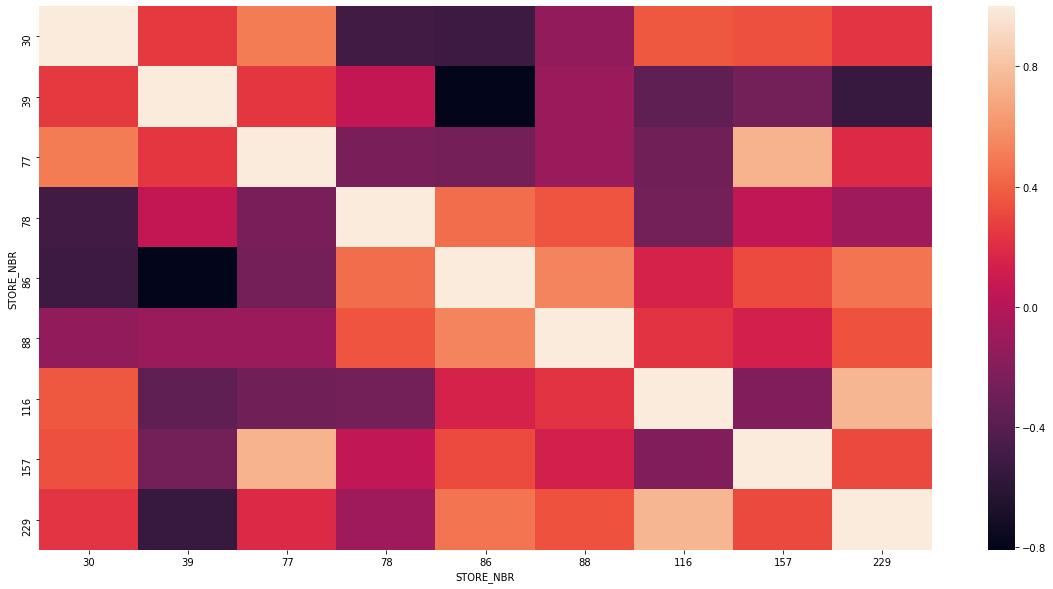

In [176]:
#print(pivot_month_sale.columns)
plt.figure(figsize = (20,10))
# filters_store = [str(i) for i in range(260,275)]
# filters_store.extend(['77','86','88'])
# filters_store_77 = ['77', '11', '31', '184']
# filters_store_86 = ['86', '31', '193']
# filters_store_88 = ['88', '159', '193', '206', '228', '229']
# filters_store_all = ['77', '86', '88', '1', '17', '26', '157', '193', '212', '229', '257']
filters_store_corr = ['77', '86', '88', '188', '226', '212', '157','229']
filters_store = ['39', '229', '116', '30', '86', '78', '77', '88','157']
df = pivot_month_sale.loc[:, pivot_month_sale.columns.isin(filters_store)]
ax = sns.heatmap(df.corr())
plt.show()

In [118]:
pivot_month_sale

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTH,,,,,,,,,,,,,,,,,,,,,
2018-07,206.9,150.8,1205.70,1399.90,812.0,260.0,1024.7,381.6,289.7,892.00,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
2018-08,176.1,193.8,1079.75,1259.50,745.1,203.2,1119.9,383.0,327.5,878.65,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
2018-09,278.8,154.4,1021.50,1198.60,896.0,207.7,1147.3,293.0,369.7,945.00,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70
2018-10,188.1,167.8,1037.90,1346.40,798.0,292.4,1063.9,422.8,361.0,910.80,...,36.6,170.0,162.9,170.4,14.4,237.60,1078.4,816.40,790.0,430.60
2018-11,192.6,162.9,1008.00,1212.00,771.4,255.3,1076.5,349.2,374.4,885.00,...,15.8,184.5,282.8,144.2,40.3,225.40,967.2,965.00,886.4,376.20
2018-12,189.6,136.0,1121.60,1185.60,879.2,209.1,906.1,356.4,382.6,936.60,...,24.6,288.5,205.3,157.8,15.4,207.30,935.4,1038.00,807.4,403.90
2019-01,154.8,162.8,1051.70,1525.00,838.0,191.1,975.1,445.0,399.4,878.60,...,21.3,247.3,176.7,148.7,34.4,157.70,980.4,1066.60,842.4,423.00
2019-02,225.4,139.4,1197.70,883.40,727.0,224.0,1026.4,345.4,259.4,853.00,...,37.4,175.2,212.7,119.7,23.0,165.00,955.2,868.40,746.2,395.50
2019-03,192.9,192.1,1124.40,1192.40,681.4,179.5,1145.8,441.4,367.6,862.00,...,26.0,161.0,164.1,128.2,23.6,225.00,845.8,991.20,735.8,442.30


In [146]:
#Finding abs of trail stores with all stores using avg customer per month
monthly_customer = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TXN_ID'].count()).reset_index()
pivot_month_cust = monthly_customer.pivot_table('TXN_ID', ['MONTH'], 'STORE_NBR')

pivot_month_cust=pivot_month_cust.dropna(axis=1)
new_abs_df = pd.DataFrame()
for columns in pivot_month_cust.columns:
    new_abs_df[columns]= abs((pivot_month_cust[columns]-pivot_month_cust[77])+
                                  (pivot_month_cust[columns]-pivot_month_cust[86])+
                                  (pivot_month_cust[columns]-pivot_month_cust[88]))
#print(new_abs_df)
#Finding abs of trial stores with all stores using total sales
monthly_customer = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['TOT_SALES'].sum()).reset_index()
pivot_month_sales = monthly_customer.pivot_table('TOT_SALES', ['MONTH'], 'STORE_NBR')

pivot_month_sales=pivot_month_sales.dropna(axis=1)
new_abs_df1 = pd.DataFrame()
for columns in pivot_month_sales.columns:
    new_abs_df1[columns]= abs((pivot_month_sales[columns]-pivot_month_sales[77])+
                                  (pivot_month_sales[columns]-pivot_month_sales[86])+
                                  (pivot_month_sales[columns]-pivot_month_sales[88]))
    new_abs_df[columns] = new_abs_df[columns] + new_abs_df1[columns]
#print(new_abs_df)
#Finding abs of trial stores with all stores using total sales
trax_monthly = pd.DataFrame(store_data.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].value_counts())
trax_monthly=pd.DataFrame(trax_monthly.groupby(['STORE_NBR','MONTH'])['LYLTY_CARD_NBR'].mean().reset_index())
pivot_month_sales = trax_monthly.pivot_table('LYLTY_CARD_NBR', ['MONTH'], 'STORE_NBR')

pivot_month_sales=pivot_month_sales.dropna(axis=1)
new_abs_df1 = pd.DataFrame()
for columns in pivot_month_sales.columns:
    new_abs_df1[columns]= abs((pivot_month_sales[columns]-pivot_month_sales[77])+
                                  (pivot_month_sales[columns]-pivot_month_sales[86])+
                                  (pivot_month_sales[columns]-pivot_month_sales[88]))
    new_abs_df[columns] = new_abs_df[columns] + new_abs_df1[columns]
print(new_abs_df.sum(axis=0).sort_values().head())

39     2206.486728
229    2246.692664
30     2372.578869
116    2475.674477
78     2522.396415
dtype: float64


## Control strore finalization:
### After carefully reviewing heatmap correlation and absolute distance over 3 matrices, following control stores have been selected.

* <strong>Control stores: 39, 229, 116</strong>

<strong> Matrix used: </strong>
* Total sales per month
* Total customers per month
* Avg. transactions per customer in a month

In [170]:
# Review of selected control stores
comparision_two_month_sale(157, 77)
comparision_two_month_sale(157, 86)
comparision_two_month_sale(157, 88)

In [171]:
comparision_month_cust_total(229, 77)
comparision_month_cust_total(229, 86)
comparision_month_cust_total(229, 88)

In [172]:
comparision_month_cust_trax(157, 77)
comparision_month_cust_trax(157, 86)
comparision_month_cust_trax(157, 88)